In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\saila\OneDrive\Desktop\MLPROJECT\Height-weight\Height-weight-linear-regression\weight-height.csv")
print(df.head())


  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [7]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Male      0.5
Female    0.5
Name: proportion, dtype: float64

In [28]:
df_temp = df.copy()
df_temp['Gender_Encoded'] = df_temp['Gender'].map({'Male': 1, 'Female': 0})
correlation_matrix = df_temp[['Height', 'Weight', 'Gender_Encoded']].corr()
print(correlation_matrix)

                  Height    Weight  Gender_Encoded
Height          1.000000  0.924756        0.691072
Weight          0.924756  1.000000        0.796723
Gender_Encoded  0.691072  0.796723        1.000000


In [29]:
df.duplicated().sum()

np.int64(0)

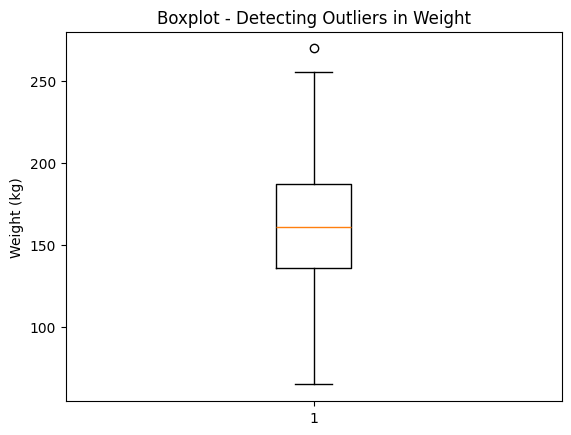

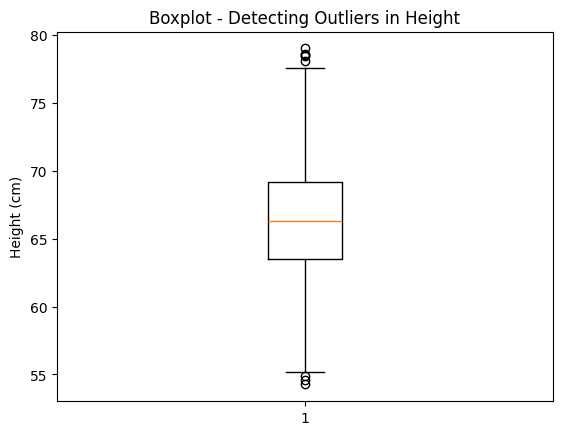

In [30]:
plt.boxplot(df['Weight'])
plt.title("Boxplot - Detecting Outliers in Weight")
plt.ylabel("Weight (kg)")
plt.show()
plt.boxplot(df['Height'])
plt.title("Boxplot - Detecting Outliers in Height")
plt.ylabel("Height (cm)")
plt.show()

In [31]:
def detect_outliers_iqr(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers,lower_bound,upper_bound

In [32]:
height_outliers, h_lower, h_upper = detect_outliers_iqr(df_temp, 'Height')
weight_outliers, w_lower, w_upper = detect_outliers_iqr(df_temp, 'Weight')
print(height_outliers, h_lower, h_upper)

      Gender     Height      Weight  Gender_Encoded
994     Male  78.095867  255.690835               1
1317    Male  78.462053  227.342565               1
2014    Male  78.998742  269.989699               1
3285    Male  78.528210  253.889004               1
3757    Male  78.621374  245.733783               1
6624  Female  54.616858   71.393749               0
7294  Female  54.873728   78.606670               0
9285  Female  54.263133   64.700127               0 55.00265861279534 77.67722359525831


In [33]:
# Remove outliers for Height
df_temp = df_temp[(df_temp['Height'] >= h_lower) & (df_temp['Height'] <= h_upper)]

# Remove outliers for Weight
df_temp = df_temp[(df_temp['Weight'] >= w_lower) & (df_temp['Weight'] <= w_upper)]


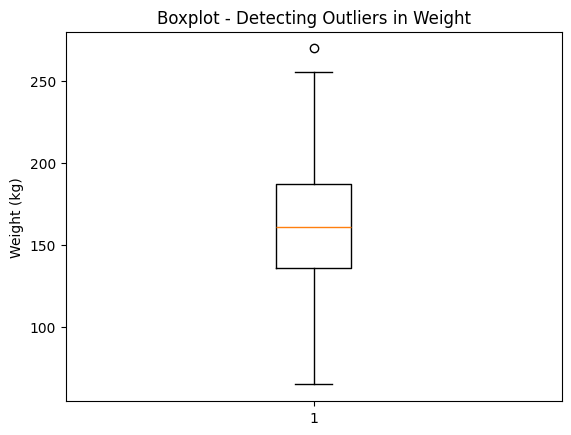

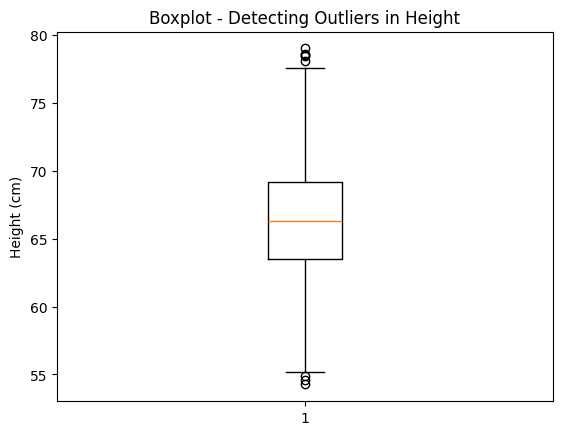

In [ ]:
plt.boxplot(df_temp['Weight'])
plt.title("Boxplot - Detecting Outliers in Weight")
plt.ylabel("Weight (kg)")
plt.show()
plt.boxplot(df_temp['Height'])
plt.title("Boxplot - Detecting Outliers in Height")
plt.ylabel("Height (cm)")
plt.show()